In [4]:
from google.colab import drive
drive.mount('/content/drive')
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt
import math
%matplotlib inline
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_regression
!pip install shap
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

Mounted at /content/drive


In [12]:
def read_and_preprocess_data(return_as_df = False):
  df = pd.read_csv('/content/drive/MyDrive/Player_Soccer_work/data/transformed_data.csv')
  column_names = ['Nation', 'Club', 'Leauge', 'Age', 'MP',
        'Starts', 'Min', 'Gls', 'Ast', 'PK_x', 'PKatt_x', 'CrdY', 'CrdR',
        'Gls90', 'Ast90', 'G+A', 'Gls+Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'FK',
        'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Tackle', 'TackleW',
        'TakleD', 'Press', 'Succ_x', '%', 'Blocks', 'ShotB', 'PassB', 'Int',
        'Clr', 'Passes Completed', 'Passes Attempted', 'Cmp%', 'Touches',
        'Succ_y', 'Att', 'Succ%', '#Pl', 'NR', 'FW', 'MF', 'WB', 'DF']
  X_train = df.loc[:, column_names]

  X = X_train.values
  X = preprocessing.scale(preprocessing.normalize(X))
  X = pd.DataFrame(X, columns = column_names)
  if return_as_df:
    return df
  y = df['Market Value']
  return X, y

####Mutual Information Score:


In [9]:
def Mutual_information_score():
  X, y = read_and_preprocess_data()
  # Calculate mutual information scores
  mutual_info_scores = mutual_info_regression(X, y)

  # Create a DataFrame for better visualization
  mutual_info_df = pd.DataFrame(mutual_info_scores, index=X.columns, columns=['mutual_info'])
  mutual_info_df = mutual_info_df.sort_values(by='mutual_info', ascending=False)
  print(mutual_info_df)


In [11]:
Mutual_information_score()

####Pearson


In [ ]:
def pearson():
  X, y = read_and_preprocess_data()
  X = sm.add_constant(X,prepend=False)
  X.columns =['Nation', 'Club', 'Leauge', 'Age', 'MP',
        'Starts', 'Min', 'Gls', 'Ast', 'PK_x', 'PKatt_x', 'CrdY', 'CrdR',
        'Gls90', 'Ast90', 'G+A', 'Gls+Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'FK',
        'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Tackle', 'TackleW',
        'TakleD', 'Press', 'Succ_x', '%', 'Blocks', 'ShotB', 'PassB', 'Int',
        'Clr', 'Passes Completed', 'Passes Attempted', 'Cmp%', 'Touches',
        'Succ_y', 'Att', 'Succ%', '#Pl', 'NR', 'FW', 'MF', 'WB', 'DF', 'Intercept']
  X['Market Value'] = y.values
  pearson_corr_matrix = df.corr(method='pearson')
  spearman_corr_matrix = df.corr(method='spearman')
  return pearson_corr_matrix['Market Value'], spearman_corr_matrix['Market Value']

In [ ]:
pearson_corr_matrix, spearman_corr_matrix = pearson()

####Coefficients and plots

In [14]:
def plot_coefficients():
  df = read_and_preprocess_data(True)
  # Select the variables for analysis
  vars_of_interest = ['Nation', 'Club', 'Leauge', 'Age', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'PK_x', 'PKatt_x', 'CrdY', 'CrdR', 
                      'Gls90', 'Ast90', 'G+A', 'Gls+Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'FK', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 
                      'G/SoT', 'Tackle', 'TackleW', 'TakleD', 'Press', 'Succ_x', '%', 'Blocks', 'ShotB', 'PassB', 'Int', 'Clr',
                      'Passes Completed', 'Passes Attempted', 'Cmp%', 'Touches', 'Succ_y', 'Att', 'Succ%', '#Pl', 'NR', 'FW', 
                      'MF', 'WB', 'DF', 'Market Value']

  # Create scatterplots between each variable and the target variable "Market Value"
  for var in vars_of_interest:
      sns.lmplot(x=var, y='Market Value', data=df, height=5, aspect=1.5)
      plt.show()

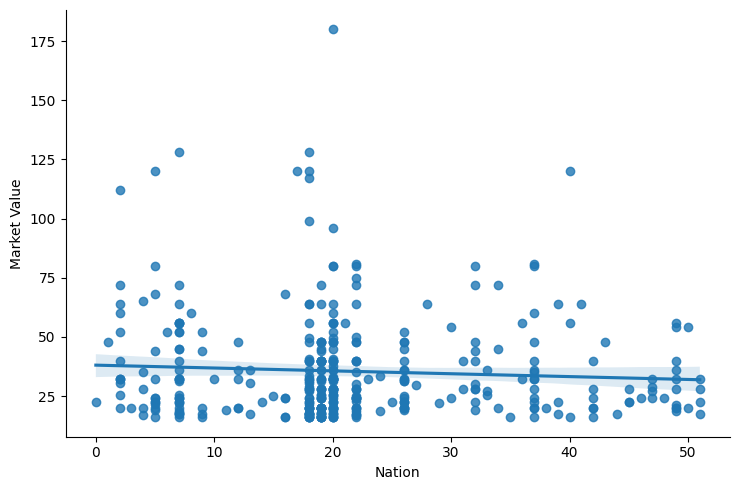

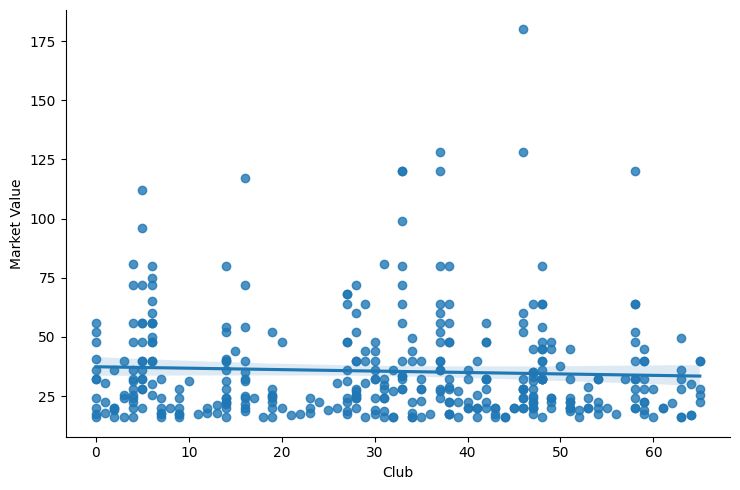

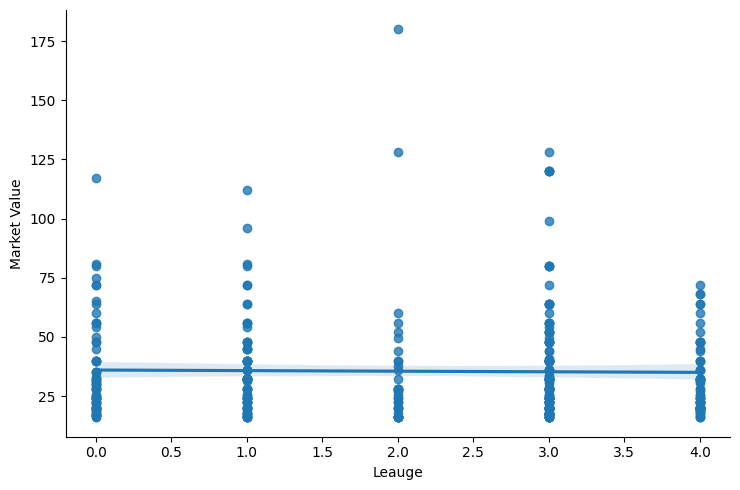

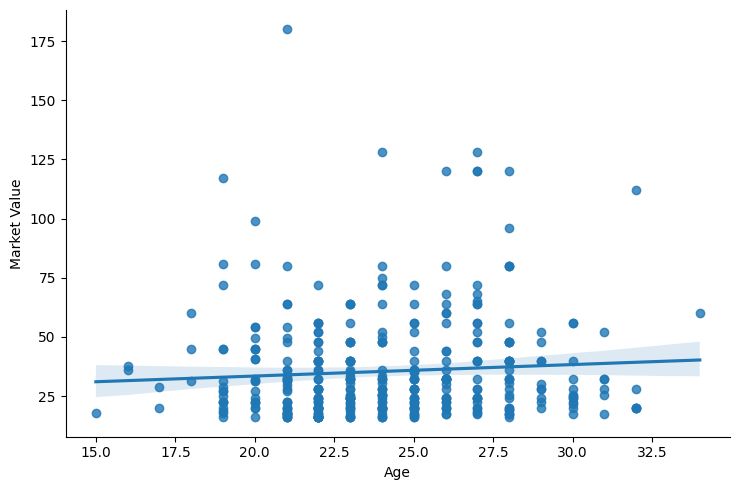

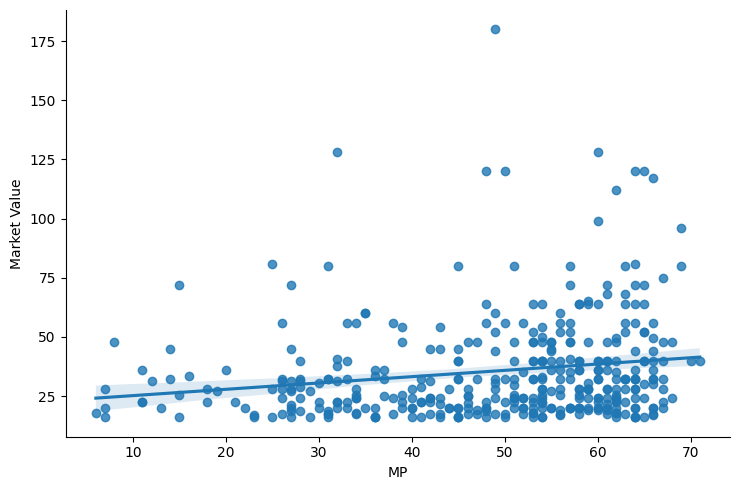

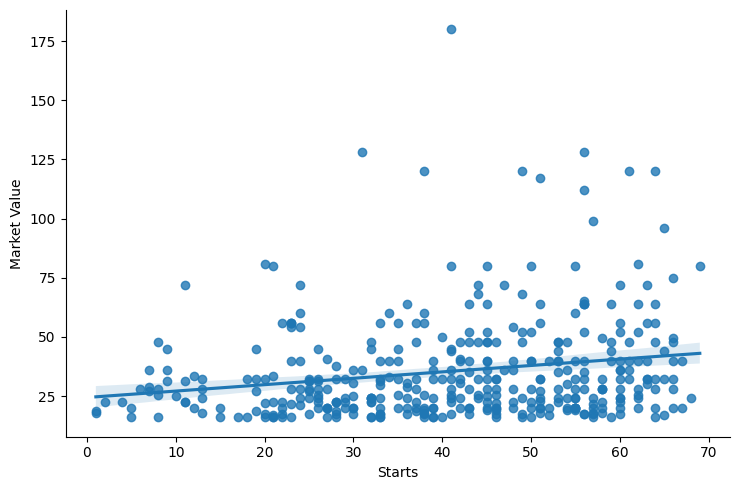

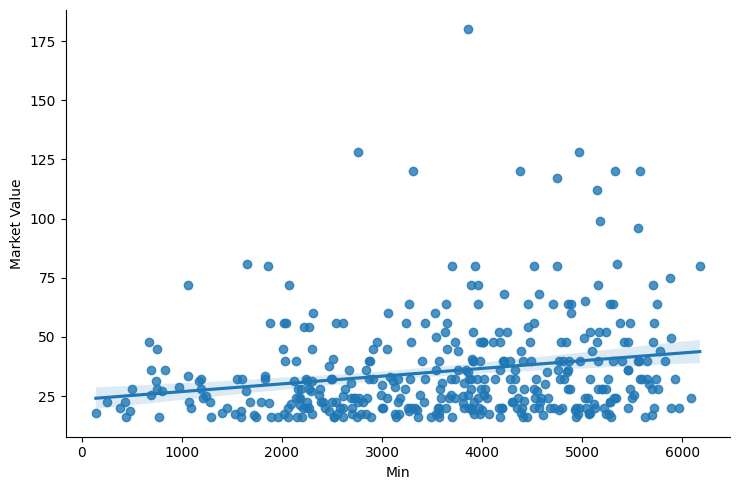

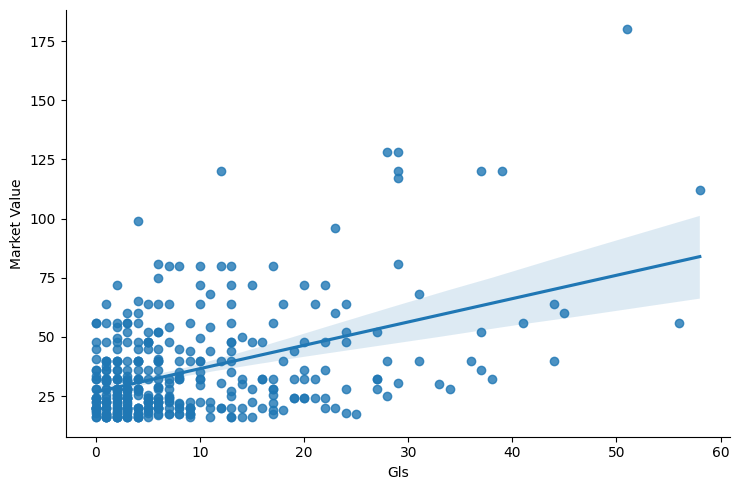

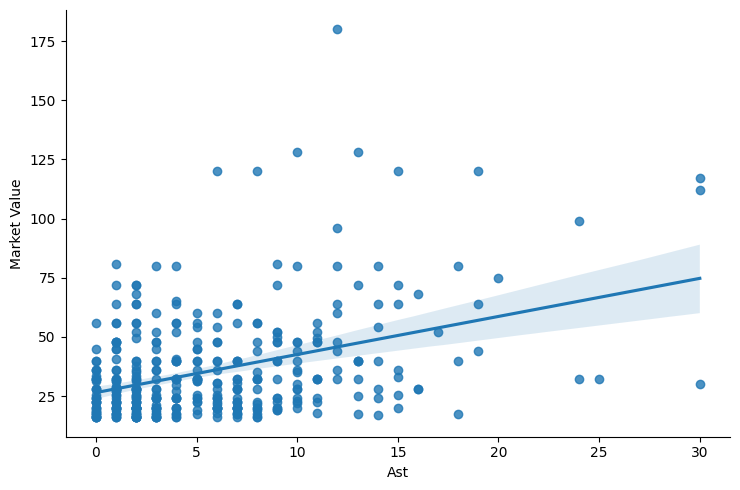

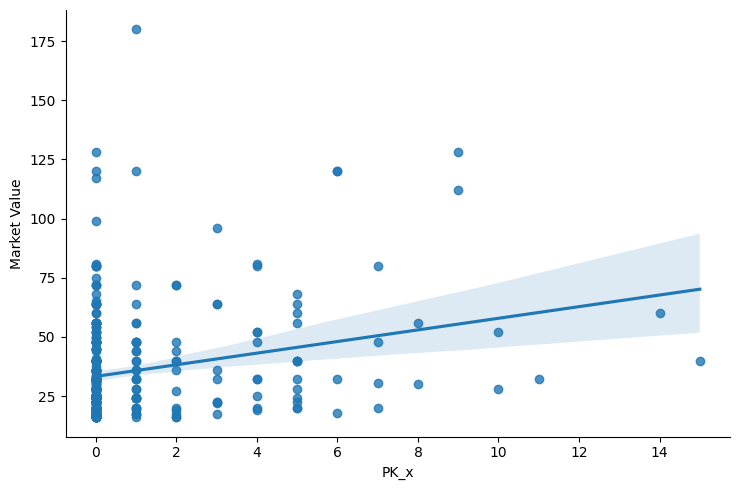

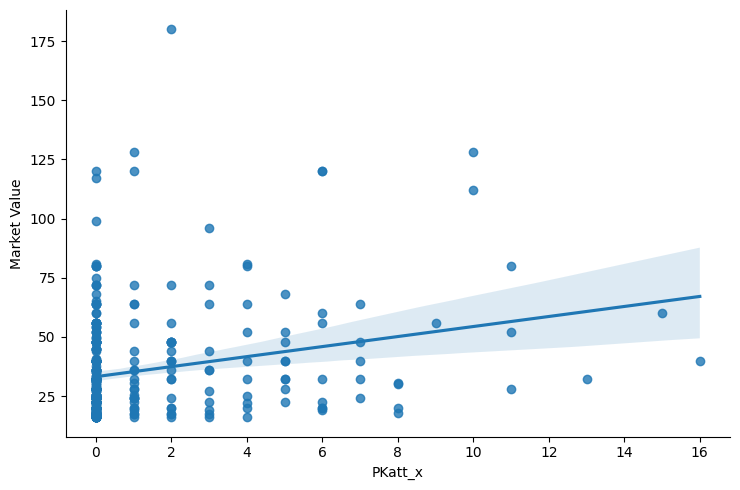

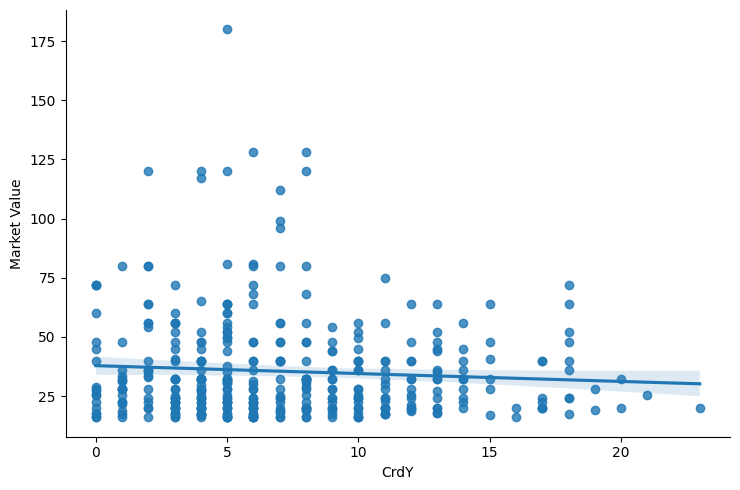

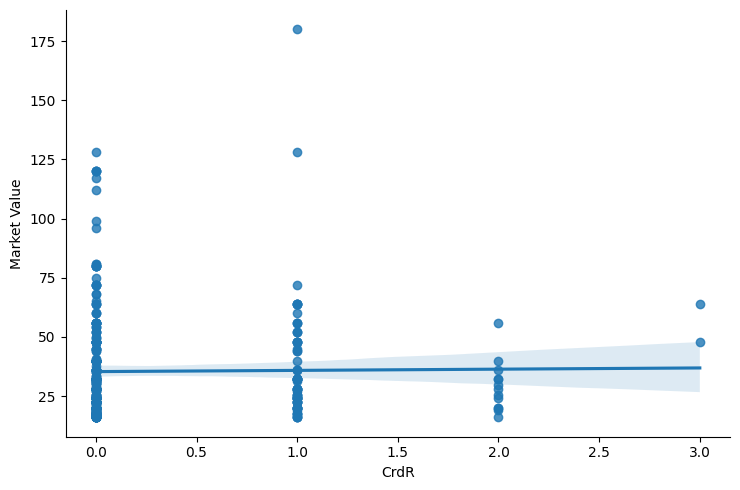

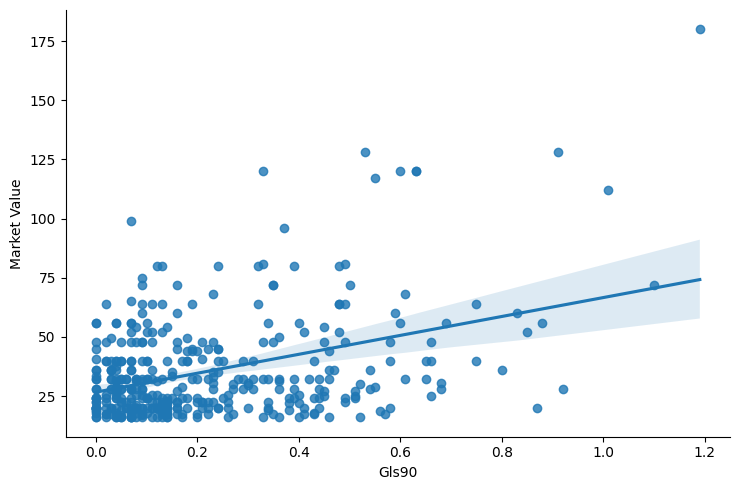

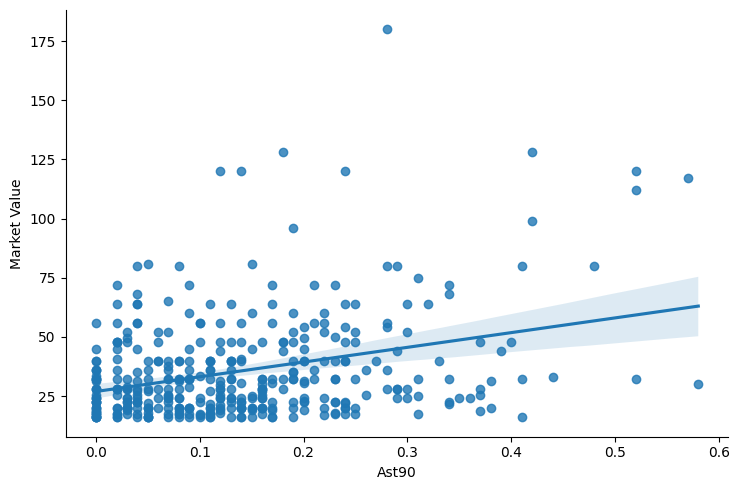

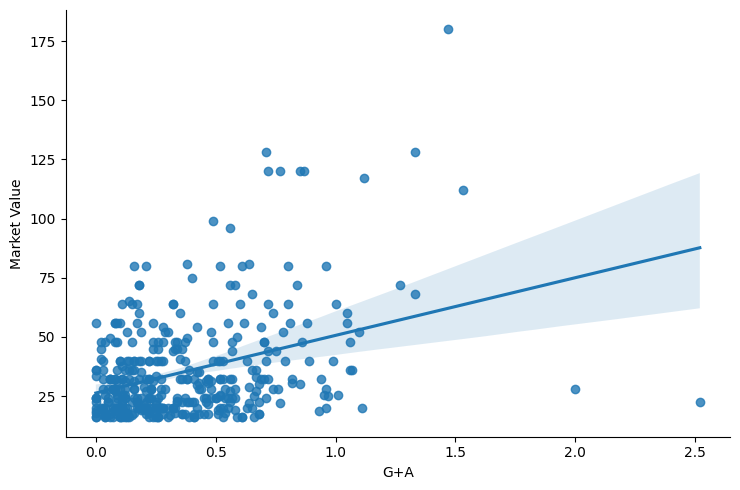

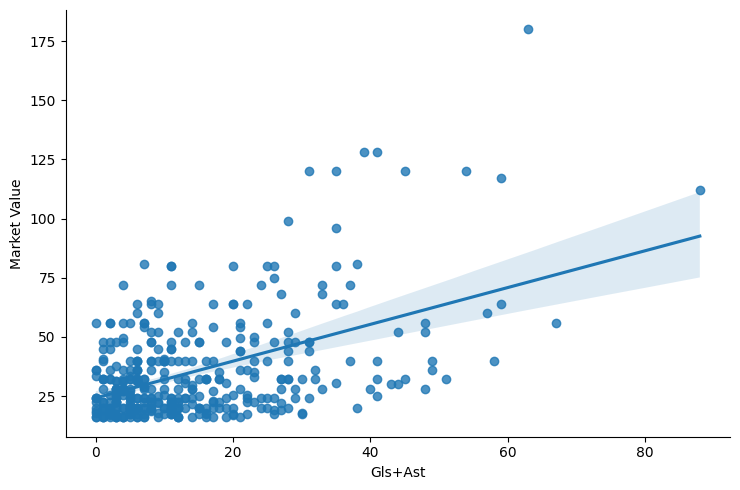

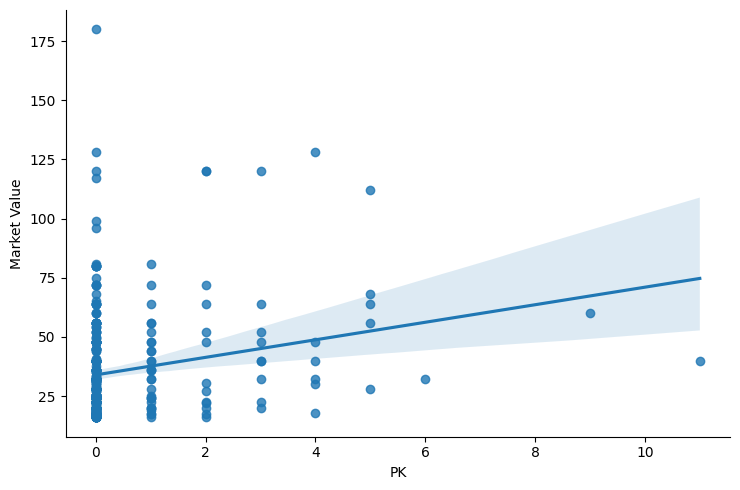

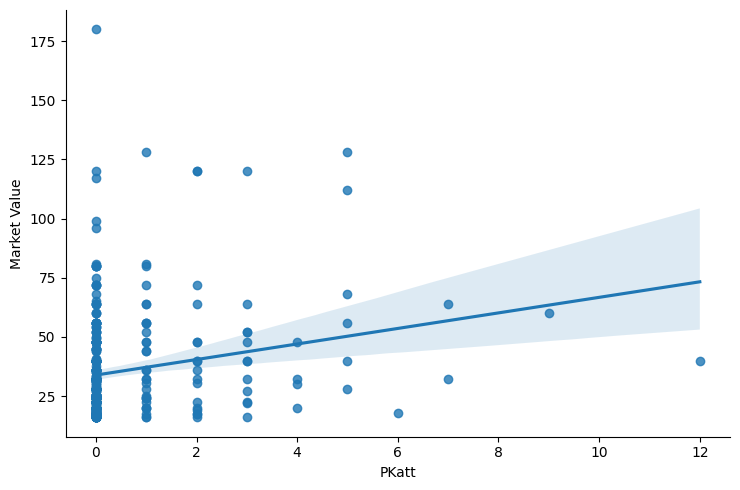

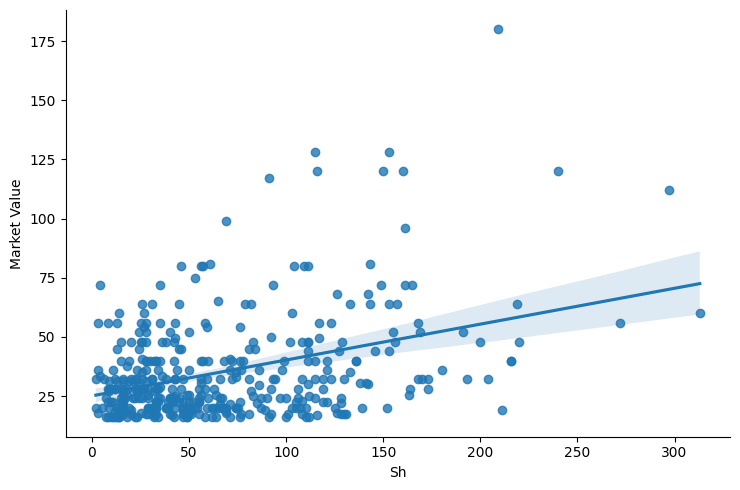

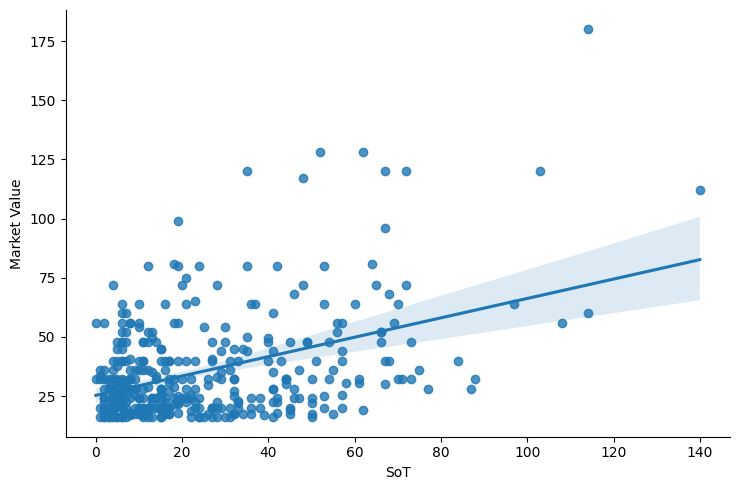

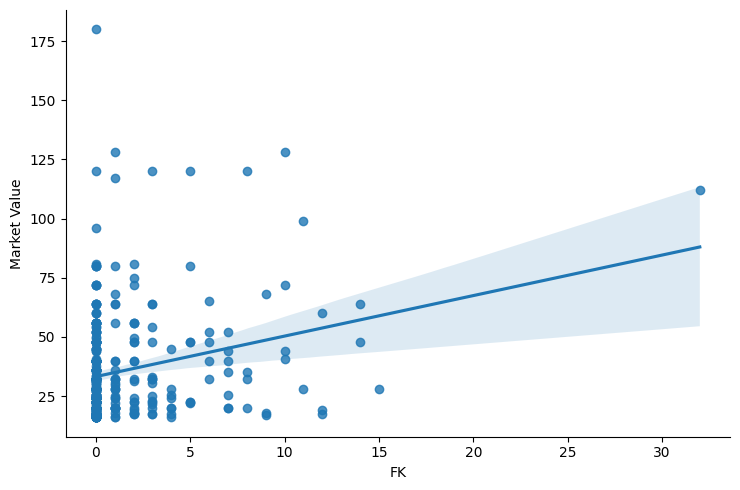

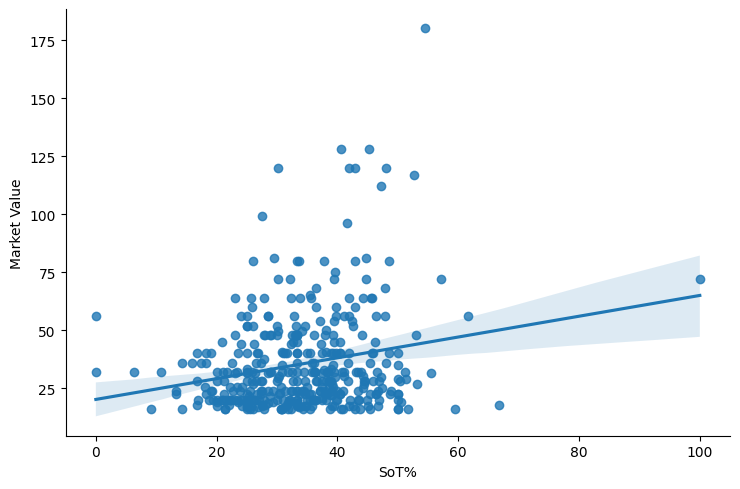

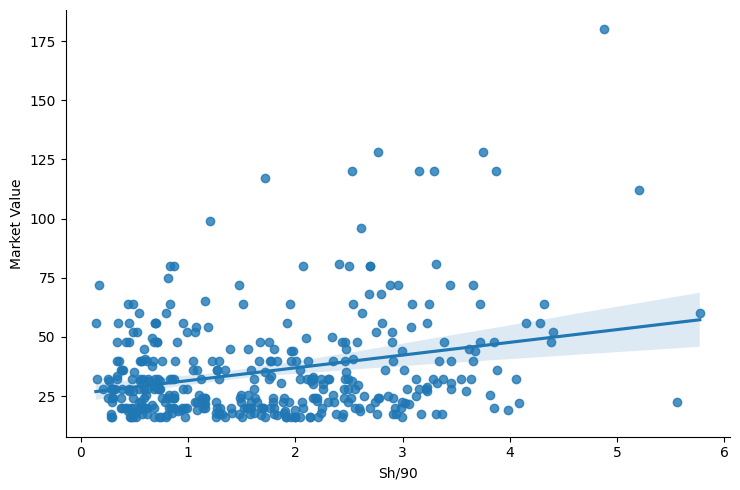

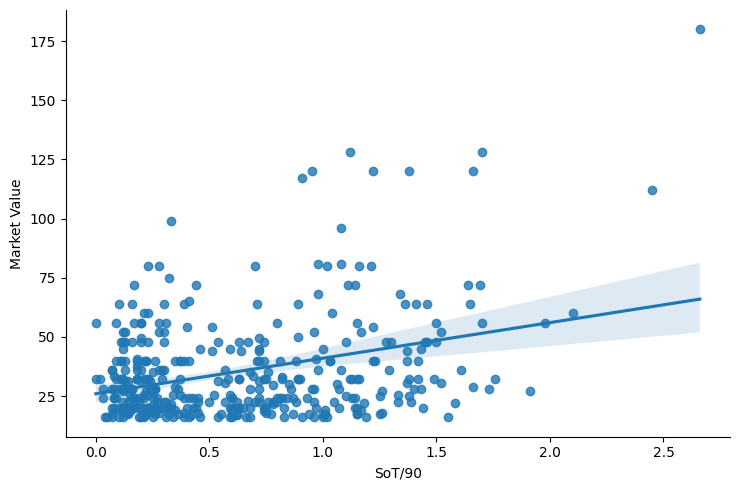

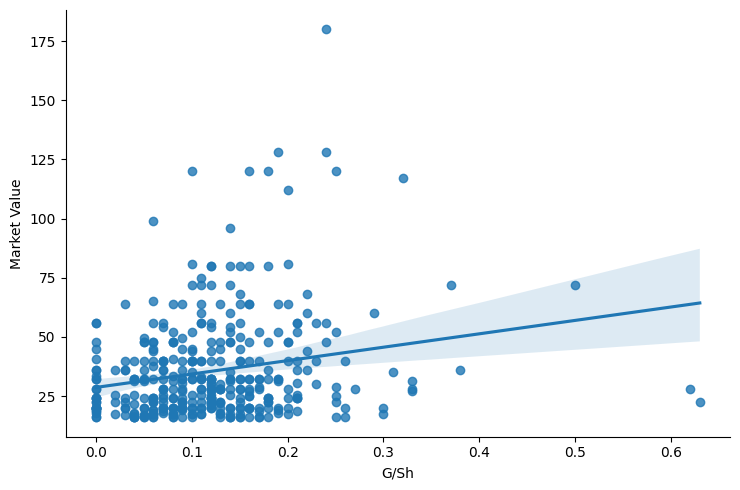

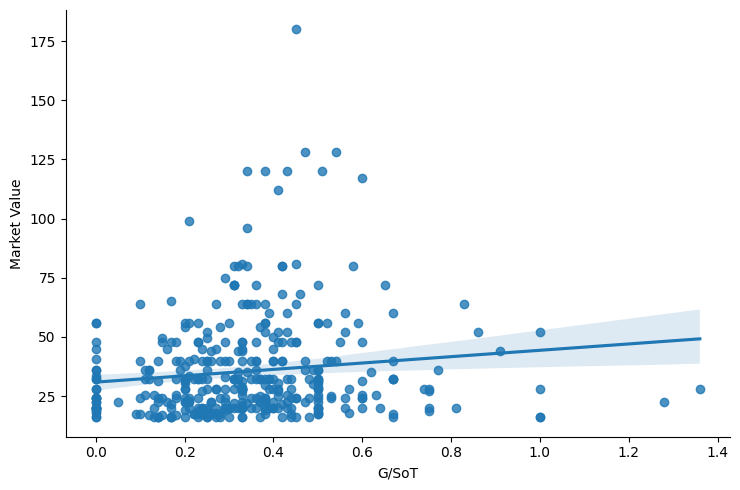

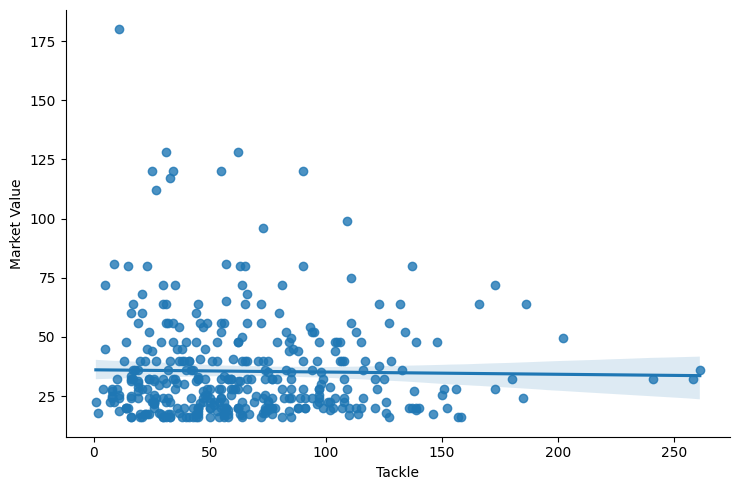

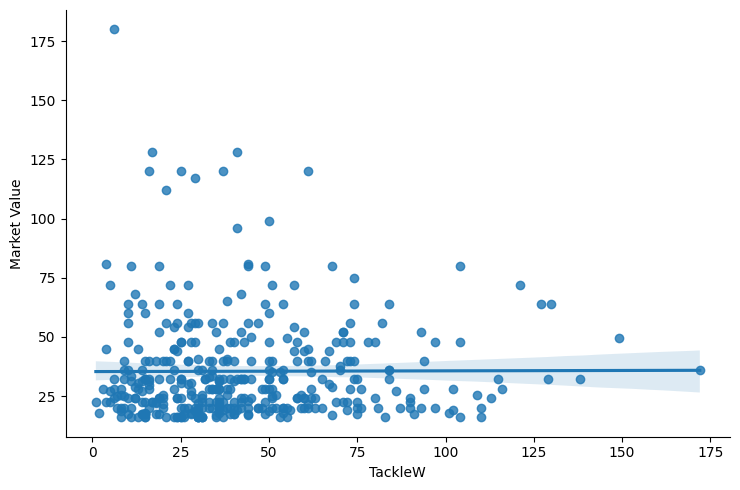

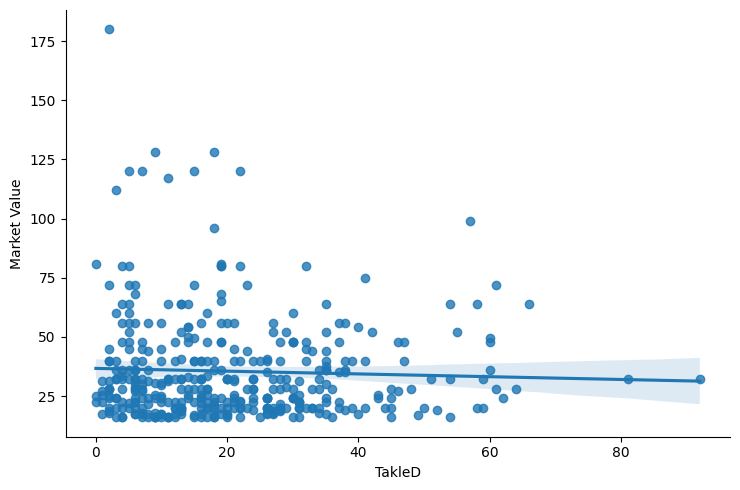

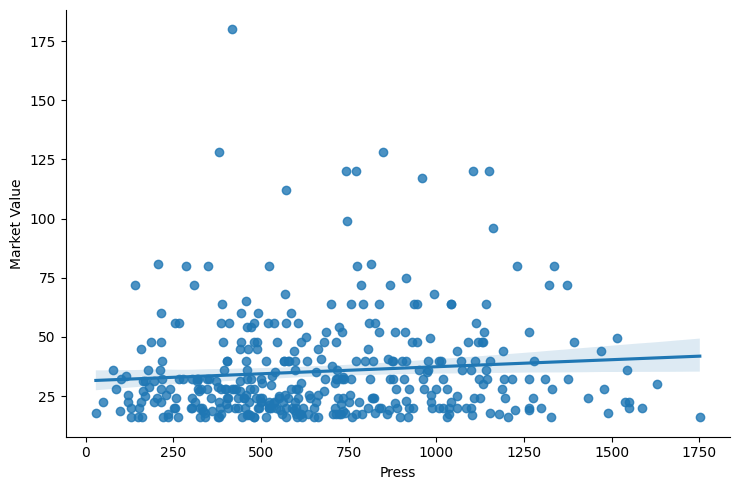

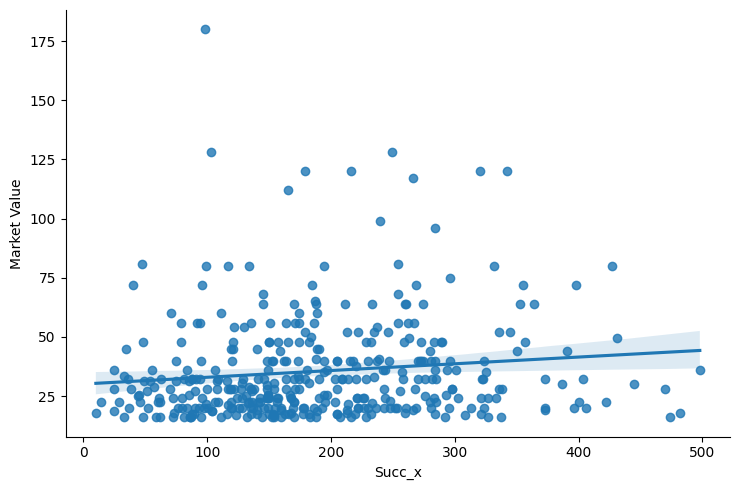

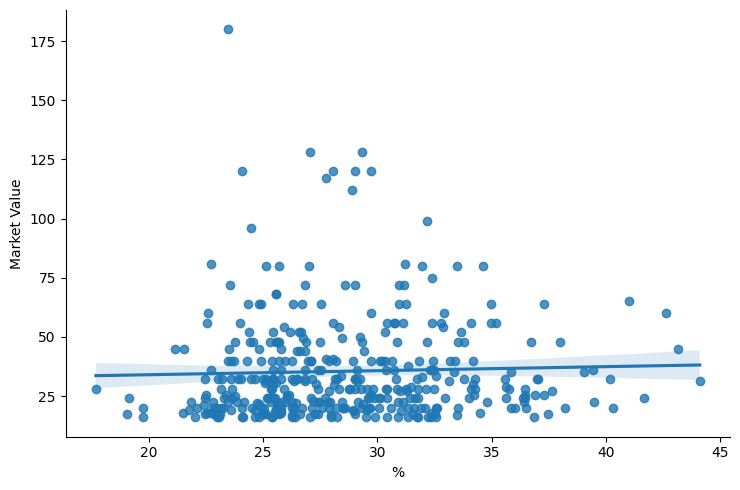

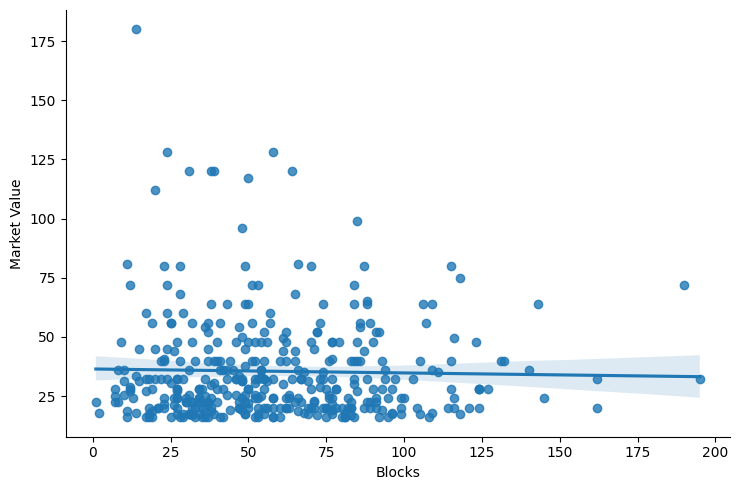

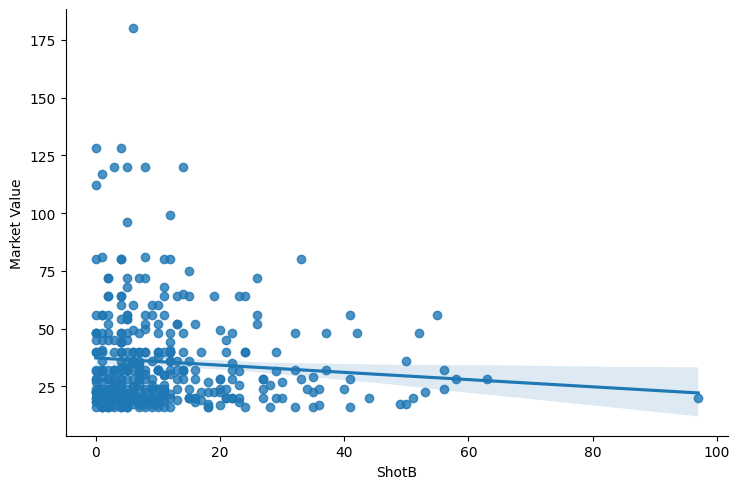

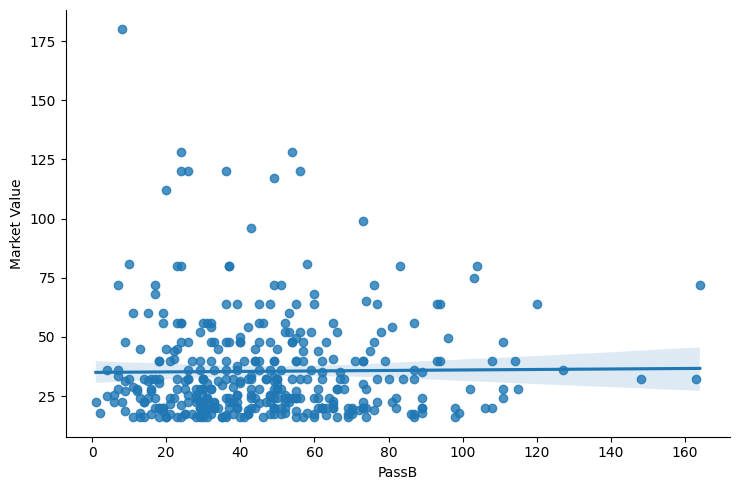

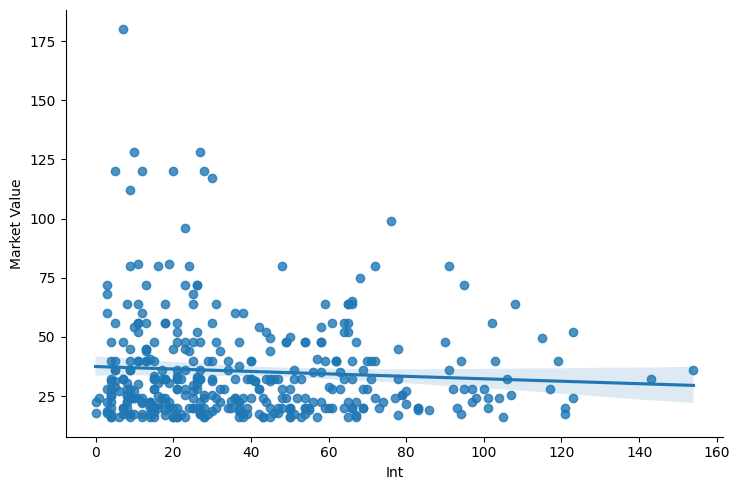

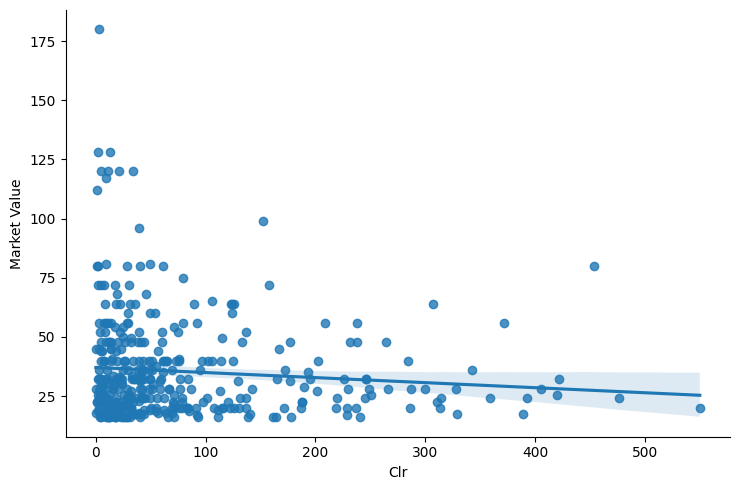

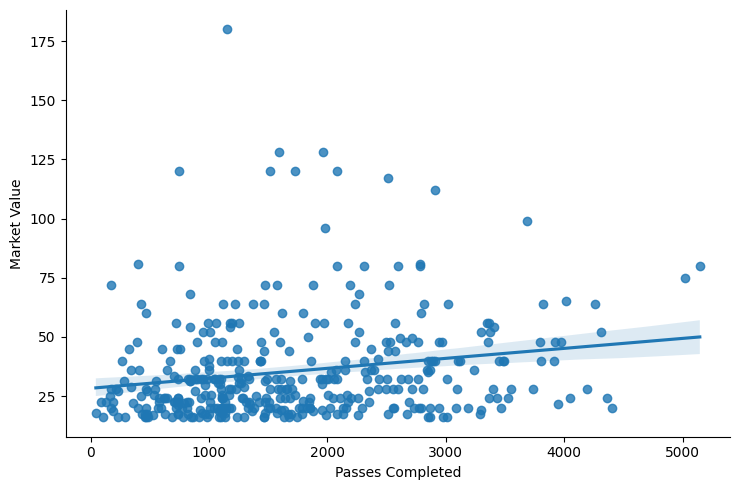

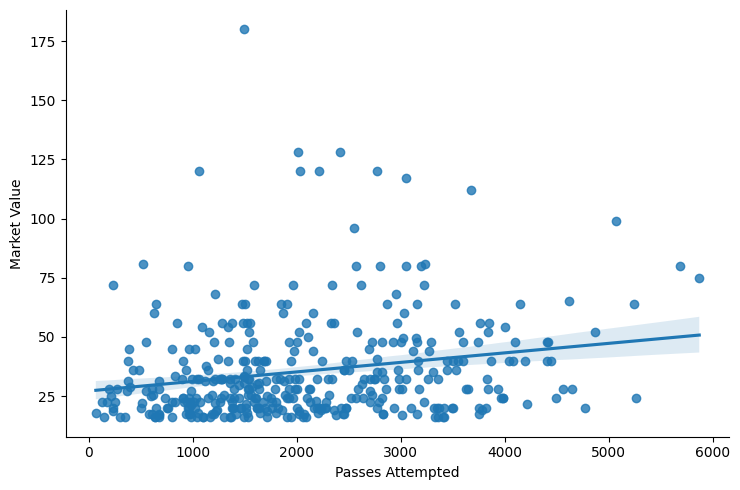

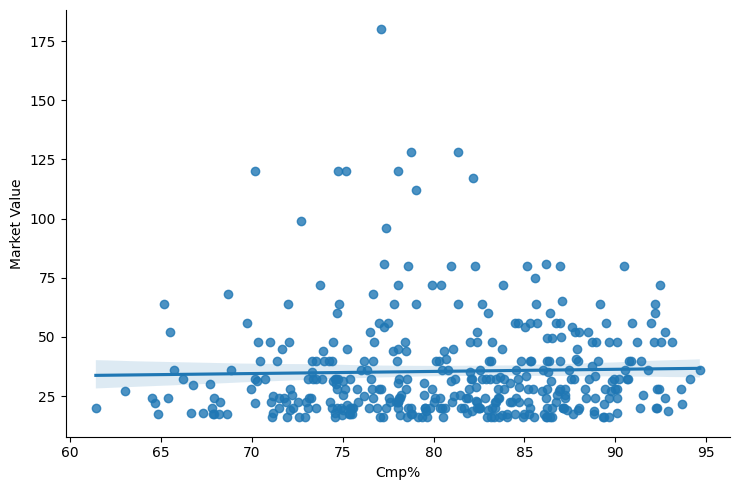

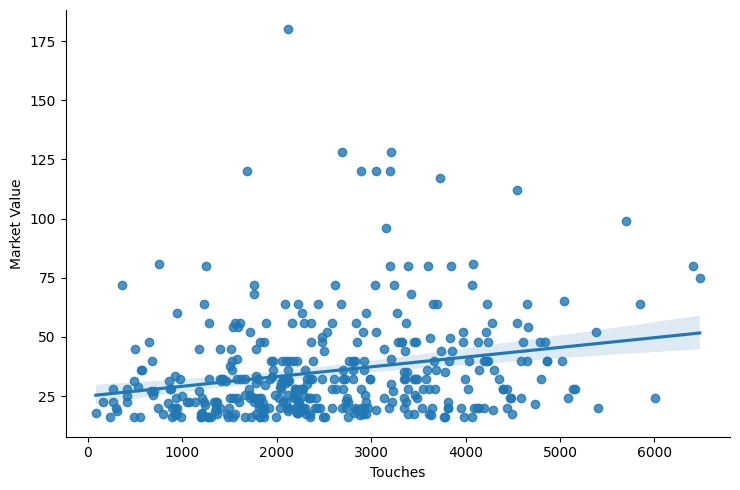

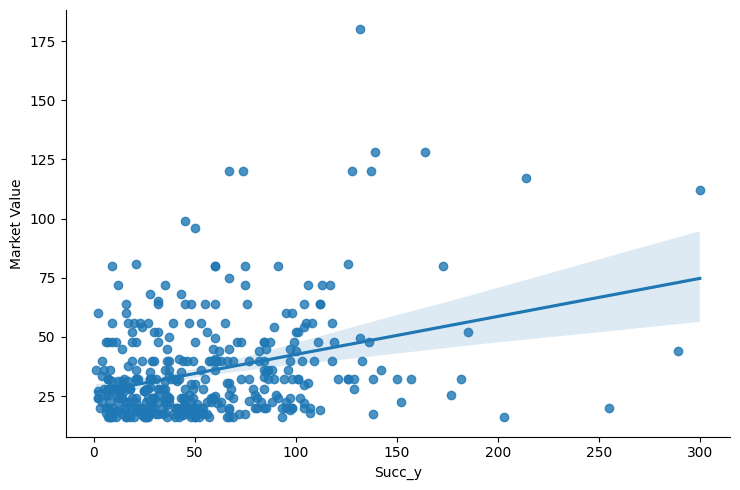

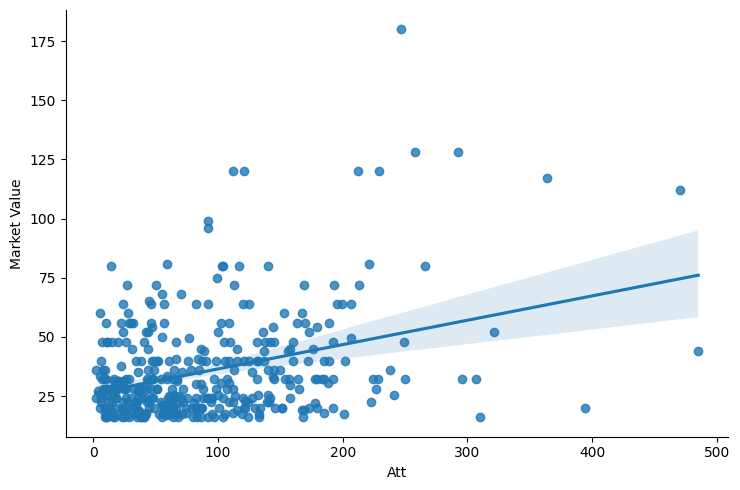

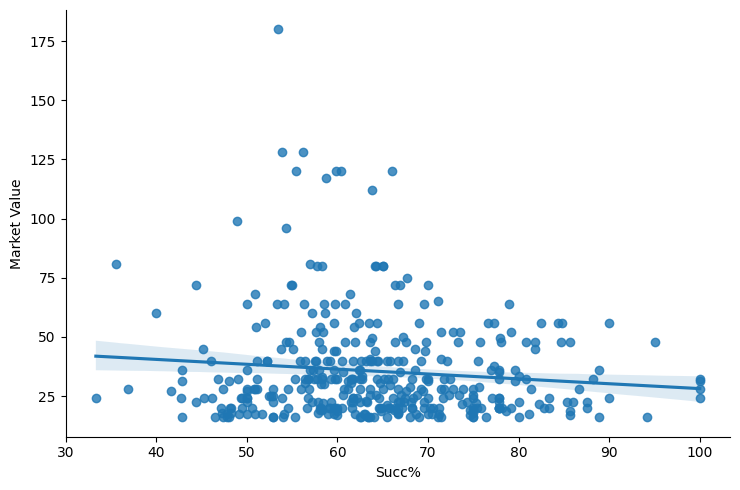

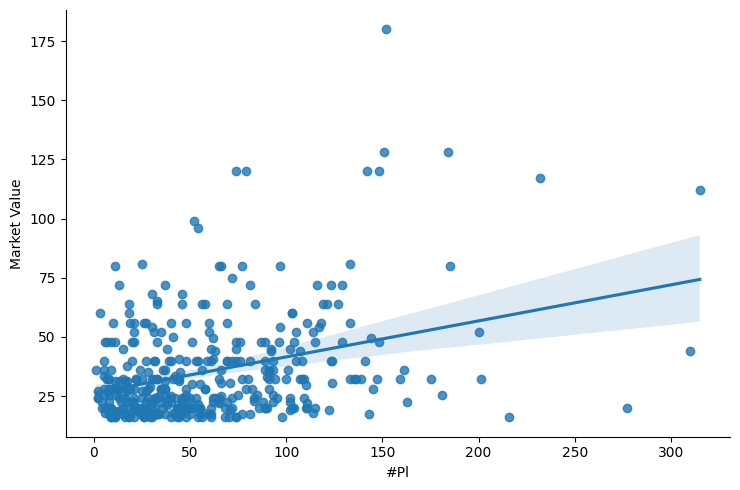

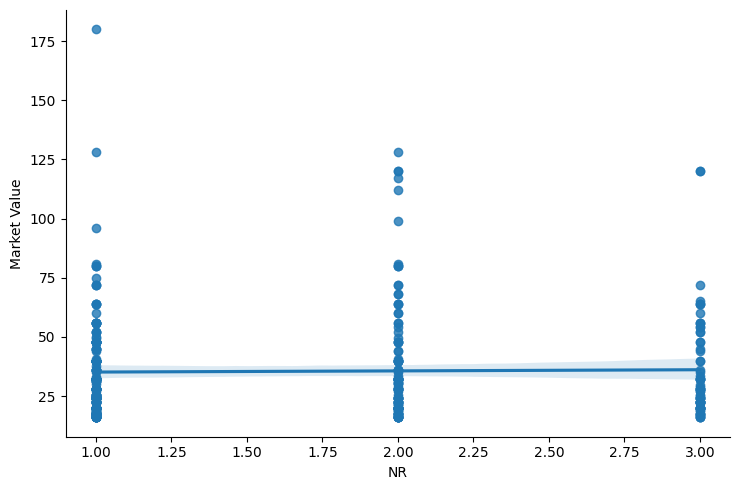

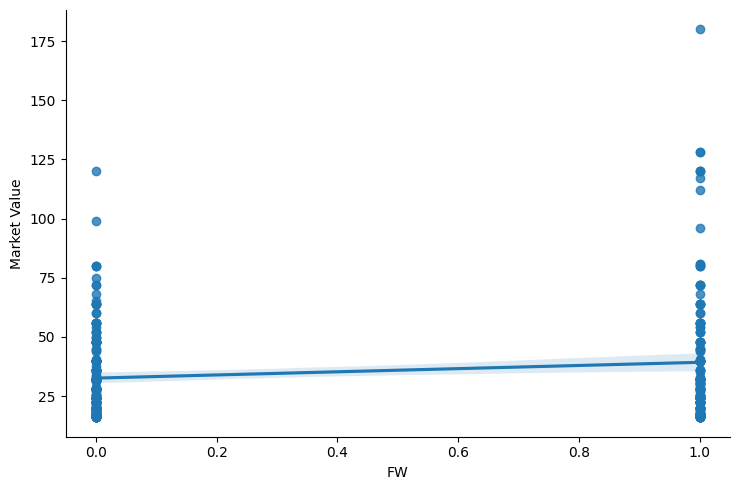

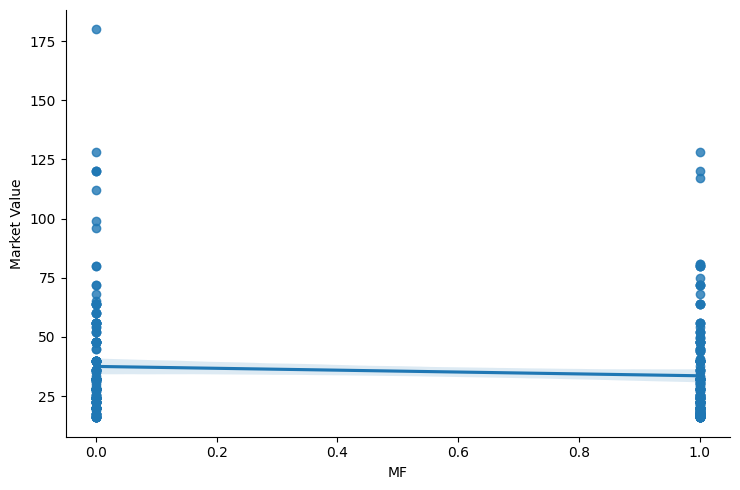

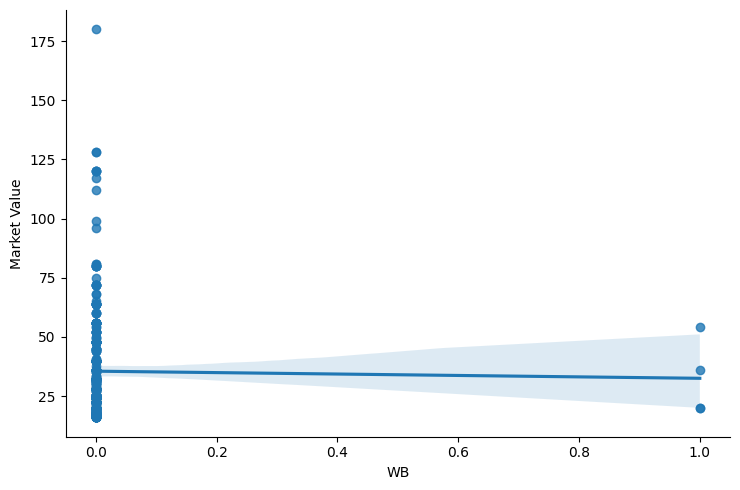

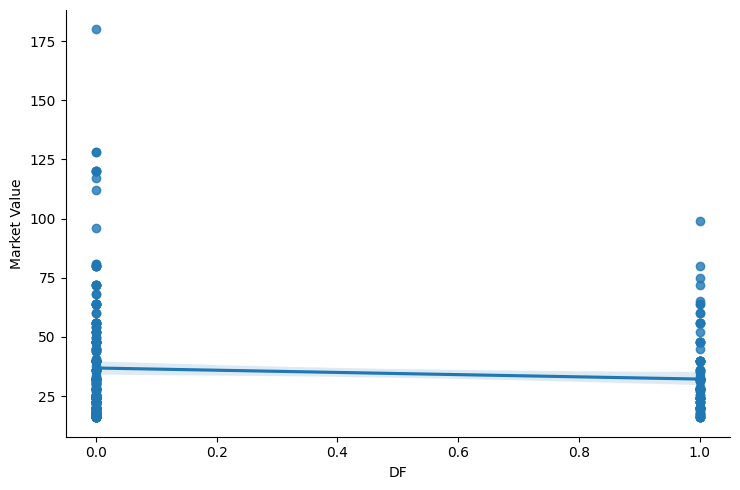

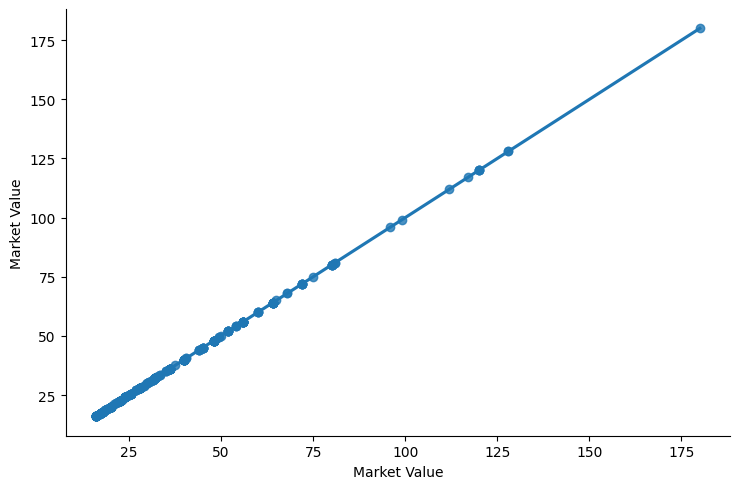

In [15]:
plot_coefficients()

#### OLS linear regression

In [ ]:
def implementOLSLinearRegression():
  X, y = read_and_preprocess_data()
  X = sm.add_constant(X,prepend=False)
  X.columns =['Nation', 'Club', 'Leauge', 'Age', 'MP',
        'Starts', 'Min', 'Gls', 'Ast', 'PK_x', 'PKatt_x', 'CrdY', 'CrdR',
        'Gls90', 'Ast90', 'G+A', 'Gls+Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'FK',
        'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Tackle', 'TackleW',
        'TakleD', 'Press', 'Succ_x', '%', 'Blocks', 'ShotB', 'PassB', 'Int',
        'Clr', 'Passes Completed', 'Passes Attempted', 'Cmp%', 'Touches',
        'Succ_y', 'Att', 'Succ%', '#Pl', 'NR', 'FW', 'MF', 'WB', 'DF', 'Intercept']

  # Fit the OLS regression model
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model = sm.OLS(y_train, X_train).fit()
  y_pred = model.predict(X_test)
  

  # Assuming you have the actual market values for the test data in a Series called 'actual_values'
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Print the model summary
  coeffs = model.params
  for i, col_name in enumerate(X.columns):
   print(col_name + ': ', coeffs[i])
   
  
  print('Mean Squared Error: ', mse)
  print('R-squared: ', r2)

In [ ]:
implementOLSLinearRegression()

Mean Squared Error:  495.6148063127878
R-squared:  0.3075155737396257


#### Neural Network

In [ ]:
def predict_from_neural_network():
  X, y = read_and_preprocess_data()
  

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Scale the input features
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Create a simple neural network
  model = Sequential()
  model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
  model.add(Dense(1, activation='linear')) # Use 'sigmoid' activation for binary classification

  # Compile the model
  model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error') # Use 'binary_crossentropy' loss for binary classification

  # Train the model
  model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

  # Evaluate the model
  mse = model.evaluate(X_test, y_test)
  print('Mean Squared Error:', mse)

  # Get the weights of the first layer
  weights = model.layers[0].get_weights()[0]

  # Calculate the feature importance
  feature_importance = np.mean(np.abs(weights), axis=1)

  # Print the feature importance
  print('Feature importance:', feature_importance)
   
  predictions = model.predict(X_test)
  
  # Assuming you have the actual market values for the test data in a Series called 'actual_values'
  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)

  print('Mean Squared Error: ', mse)
  print('R-squared: ', r2)

In [ ]:
predict_from_neural_network()

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 1575.3052
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1555.0759
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 1537.6683
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 1519.2737
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 1500.7577
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 1481.4135
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 1461.8883
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 1441.3490
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 1420.0476
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 1397.4781
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 1373.9032
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 1349.3813
E

#### Shap Values and Permutation Importance

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 1577.3557
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1556.8541
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1537.7502
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1519.4009
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1501.0529
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1482.5576
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 1464.4484
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 1444.8301
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 1425.2159
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 1405.3646
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: 1383.8586
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 1361.4604
E

Permutation explainer:   1%|▏         | 1/77 [00:00<?, ?it/s]

161/161 [==============================] - 0s 3ms/step


Permutation explainer:   4%|▍         | 3/77 [00:26<05:14,  4.24s/it]

163/163 [==============================] - 1s 4ms/step


Permutation explainer:   5%|▌         | 4/77 [00:35<07:27,  6.14s/it]

163/163 [==============================] - 1s 5ms/step


Permutation explainer:   6%|▋         | 5/77 [00:42<07:38,  6.37s/it]

158/158 [==============================] - 0s 1ms/step


Permutation explainer:   8%|▊         | 6/77 [00:46<06:48,  5.75s/it]

159/159 [==============================] - 0s 1ms/step


Permutation explainer:   9%|▉         | 7/77 [00:49<05:37,  4.83s/it]

158/158 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█         | 8/77 [00:52<04:48,  4.18s/it]

160/160 [==============================] - 0s 3ms/step


Permutation explainer:  12%|█▏        | 9/77 [00:56<04:39,  4.11s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  13%|█▎        | 10/77 [01:00<04:34,  4.10s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  14%|█▍        | 11/77 [01:03<04:09,  3.78s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  16%|█▌        | 12/77 [01:06<03:50,  3.54s/it]

161/161 [==============================] - 0s 3ms/step


Permutation explainer:  17%|█▋        | 13/77 [01:11<04:09,  3.90s/it]

157/157 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█▊        | 14/77 [01:15<04:02,  3.85s/it]

160/160 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█▉        | 15/77 [01:17<03:35,  3.48s/it]

155/155 [==============================] - 0s 1ms/step


Permutation explainer:  21%|██        | 16/77 [01:20<03:24,  3.35s/it]

160/160 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██▏       | 17/77 [01:25<03:45,  3.76s/it]

160/160 [==============================] - 0s 1ms/step


Permutation explainer:  23%|██▎       | 18/77 [01:28<03:27,  3.51s/it]

163/163 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██▍       | 19/77 [01:31<03:19,  3.44s/it]

161/161 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▌       | 20/77 [01:34<03:07,  3.29s/it]

158/158 [==============================] - 0s 1ms/step


Permutation explainer:  27%|██▋       | 21/77 [01:39<03:35,  3.85s/it]

162/162 [==============================] - 0s 1ms/step


Permutation explainer:  29%|██▊       | 22/77 [01:43<03:20,  3.64s/it]

161/161 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██▉       | 23/77 [01:46<03:14,  3.61s/it]

158/158 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███       | 24/77 [01:49<03:05,  3.50s/it]

157/157 [==============================] - 0s 1ms/step


Permutation explainer:  32%|███▏      | 25/77 [01:54<03:17,  3.79s/it]

159/159 [==============================] - 0s 1ms/step


Permutation explainer:  34%|███▍      | 26/77 [01:57<02:57,  3.48s/it]

161/161 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▌      | 27/77 [02:00<02:46,  3.33s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  36%|███▋      | 28/77 [02:03<02:38,  3.24s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  38%|███▊      | 29/77 [02:08<03:11,  3.98s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  39%|███▉      | 30/77 [02:11<02:52,  3.68s/it]

160/160 [==============================] - 0s 1ms/step


Permutation explainer:  40%|████      | 31/77 [02:14<02:37,  3.43s/it]

159/159 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 32/77 [02:17<02:32,  3.39s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  43%|████▎     | 33/77 [02:22<02:41,  3.67s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  44%|████▍     | 34/77 [02:25<02:26,  3.41s/it]

161/161 [==============================] - 0s 1ms/step


Permutation explainer:  45%|████▌     | 35/77 [02:27<02:16,  3.24s/it]

163/163 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 36/77 [02:36<03:23,  4.97s/it]

158/158 [==============================] - 0s 1ms/step


Permutation explainer:  48%|████▊     | 37/77 [02:42<03:30,  5.26s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  49%|████▉     | 38/77 [02:46<03:03,  4.71s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  51%|█████     | 39/77 [02:50<02:57,  4.68s/it]

158/158 [==============================] - 0s 1ms/step


Permutation explainer:  52%|█████▏    | 40/77 [02:53<02:34,  4.17s/it]

157/157 [==============================] - 0s 1ms/step


Permutation explainer:  53%|█████▎    | 41/77 [02:56<02:16,  3.79s/it]

156/156 [==============================] - 0s 1ms/step


Permutation explainer:  55%|█████▍    | 42/77 [02:59<02:00,  3.46s/it]

163/163 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▌    | 43/77 [03:04<02:10,  3.83s/it]

161/161 [==============================] - 0s 1ms/step


Permutation explainer:  57%|█████▋    | 44/77 [03:07<01:57,  3.55s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  58%|█████▊    | 45/77 [03:09<01:44,  3.28s/it]

161/161 [==============================] - 0s 1ms/step


Permutation explainer:  60%|█████▉    | 46/77 [03:12<01:37,  3.16s/it]

163/163 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████    | 47/77 [03:17<01:46,  3.54s/it]

159/159 [==============================] - 0s 1ms/step


Permutation explainer:  62%|██████▏   | 48/77 [03:19<01:37,  3.36s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  64%|██████▎   | 49/77 [03:22<01:31,  3.25s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  65%|██████▍   | 50/77 [03:25<01:23,  3.11s/it]

162/162 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▌   | 51/77 [03:29<01:27,  3.37s/it]

160/160 [==============================] - 0s 1ms/step


Permutation explainer:  68%|██████▊   | 52/77 [03:33<01:26,  3.47s/it]

160/160 [==============================] - 0s 1ms/step


Permutation explainer:  69%|██████▉   | 53/77 [03:36<01:17,  3.23s/it]

159/159 [==============================] - 0s 1ms/step


Permutation explainer:  70%|███████   | 54/77 [03:39<01:13,  3.21s/it]

163/163 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████▏  | 55/77 [03:43<01:14,  3.40s/it]

161/161 [==============================] - 0s 1ms/step


Permutation explainer:  73%|███████▎  | 56/77 [03:46<01:13,  3.50s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  74%|███████▍  | 57/77 [03:49<01:07,  3.35s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  75%|███████▌  | 58/77 [03:52<01:01,  3.22s/it]

163/163 [==============================] - 0s 2ms/step


Permutation explainer:  77%|███████▋  | 59/77 [03:57<01:05,  3.63s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  78%|███████▊  | 60/77 [04:01<01:02,  3.65s/it]

159/159 [==============================] - 0s 1ms/step


Permutation explainer:  79%|███████▉  | 61/77 [04:04<00:55,  3.45s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  81%|████████  | 62/77 [04:06<00:49,  3.28s/it]

160/160 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▏ | 63/77 [04:10<00:48,  3.49s/it]

161/161 [==============================] - 0s 1ms/step


Permutation explainer:  83%|████████▎ | 64/77 [04:14<00:46,  3.56s/it]

161/161 [==============================] - 0s 1ms/step


Permutation explainer:  84%|████████▍ | 65/77 [04:17<00:39,  3.30s/it]

161/161 [==============================] - 0s 1ms/step


Permutation explainer:  86%|████████▌ | 66/77 [04:20<00:36,  3.29s/it]

163/163 [==============================] - 0s 2ms/step


Permutation explainer:  87%|████████▋ | 67/77 [04:24<00:34,  3.49s/it]

161/161 [==============================] - 0s 1ms/step


Permutation explainer:  88%|████████▊ | 68/77 [04:27<00:30,  3.44s/it]

157/157 [==============================] - 0s 1ms/step


Permutation explainer:  90%|████████▉ | 69/77 [04:30<00:25,  3.20s/it]

159/159 [==============================] - 0s 1ms/step


Permutation explainer:  91%|█████████ | 70/77 [04:33<00:21,  3.07s/it]

159/159 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 71/77 [04:36<00:18,  3.01s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  94%|█████████▎| 72/77 [04:41<00:17,  3.60s/it]

161/161 [==============================] - 0s 1ms/step


Permutation explainer:  95%|█████████▍| 73/77 [04:44<00:13,  3.40s/it]

159/159 [==============================] - 0s 1ms/step


Permutation explainer:  96%|█████████▌| 74/77 [04:47<00:09,  3.27s/it]

161/161 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 75/77 [04:50<00:06,  3.27s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer:  99%|█████████▊| 76/77 [04:54<00:03,  3.60s/it]

161/161 [==============================] - 0s 1ms/step


Permutation explainer: 100%|██████████| 77/77 [04:57<00:00,  3.37s/it]

163/163 [==============================] - 0s 1ms/step


Permutation explainer: 78it [05:01,  3.91s/it]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


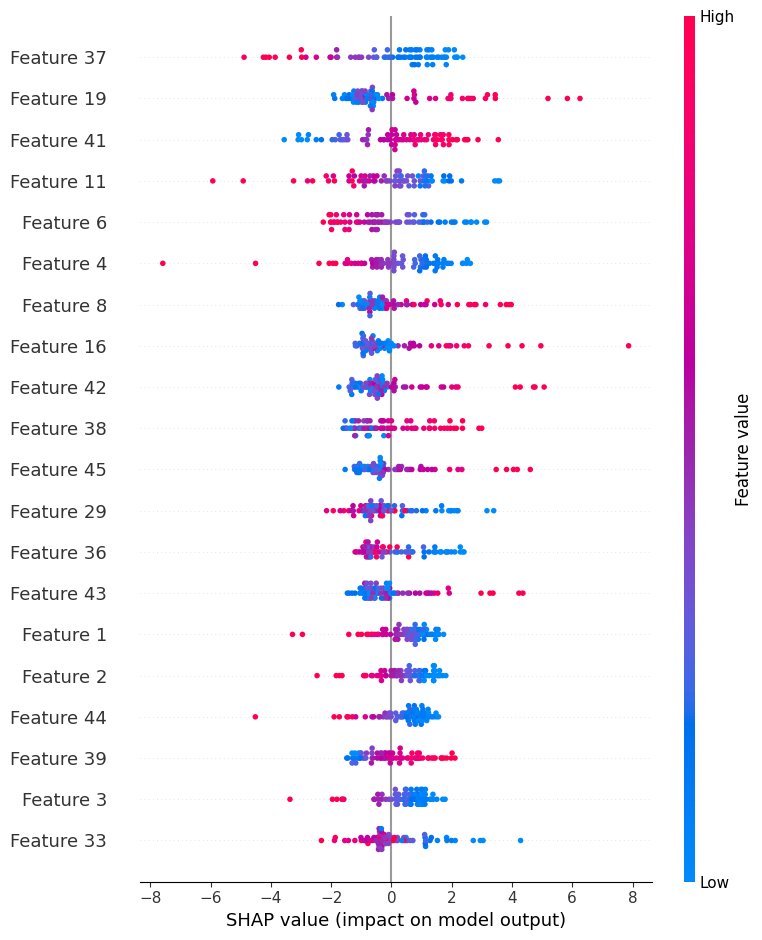

3/3 [==============================] - 0s 6ms/step
Permutation Importance:
Feature 0: -0.7635 +/- 2.2934
Feature 1: -4.3141 +/- 6.0506
Feature 2: 1.5810 +/- 6.7795
Feature 3: -7.5886 +/- 3.7943
Feature 4: -18.9002 +/- 13.5317
Feature 5: -13.9453 +/- 7.0038
Feature 6: -14.8637 +/- 9.2548
Feature 7: -32.1548 +/- 14.3626
Feature 8: -5.0646 +/- 9.2648
Feature 9: -4.0057 +/- 4.0175
Feature 10: -0.2834 +/- 2.7472
Feature 11: 2.7090 +/- 14.2541
Feature 12: 0.4280 +/- 1.3246
Feature 13: -8.2234 +/- 6.0042
Feature 14: 5.3841 +/- 11.4511
Feature 15: -0.8104 +/- 2.4795
Feature 16: -36.9588 +/- 8.6199
Feature 17: 0.6277 +/- 5.3004
Feature 18: -6.5356 +/- 7.8877
Feature 19: -25.4586 +/- 10.3930
Feature 20: -20.6931 +/- 11.7178
Feature 21: 0.1237 +/- 4.6370
Feature 22: -0.4946 +/- 1.8133
Feature 23: 0.5977 +/- 2.8819
Feature 24: -3.7541 +/- 2.3063
Feature 25: 0.6940 +/- 4.2291
Feature 26: -1.8660 +/- 4.8842
Feature 27: -6.2859 +/- 5.9093
Feature 28: -14.6418 +/- 11.5058
Feature 29: -14.7580 +/- 6.11

In [14]:
def shap_permutation_importance():
  # Load your dataset
  X, y = read_and_preprocess_data()

  # # For illustration purposes, I'll generate random data
  # X = np.random.rand(1000, 10)
  # y = np.random.rand(1000, 1)

  # Split the data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Scale the input features
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Create a simple neural network
  model = Sequential()
  model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
  model.add(Dense(1, activation='linear')) # Use 'sigmoid' activation for binary classification

  # Compile the model
  model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error') # Use 'binary_crossentropy' loss for binary classification

  # Train the model
  model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

  # Evaluate the model
  mse = model.evaluate(X_test, y_test)
  print('Mean Squared Error:', mse)

  # Define a function to wrap the model's prediction
  def model_predict(X):
      return model.predict(X).reshape(-1)

  # Calculate SHAP values
  explainer = shap.Explainer(model_predict, X_train)
  shap_values = explainer(X_test)

  # Plot SHAP values
  shap.summary_plot(shap_values, X_test, feature_names=["Feature " + str(i) for i in range(X_train.shape[1])])

  # Custom permutation importance function
  def permutation_importance(model, X, y, scoring_func, n_repeats=10, random_state=None):
      rng = np.random.default_rng(random_state)
      baseline_score = scoring_func(y, model.predict(X))
      scores = np.zeros((X.shape[1], n_repeats))
      
      for feature_idx in range(X.shape[1]):
          X_permuted = X.copy()
          for repeat_idx in range(n_repeats):
              rng.shuffle(X_permuted[:, feature_idx])
              feature_score = scoring_func(y, model.predict(X_permuted))
              scores[feature_idx, repeat_idx] = baseline_score - feature_score
              
      return np.mean(scores, axis=1), np.std(scores, axis=1)

  # Calculate permutation importance
  perm_mean, perm_std = permutation_importance(model, X_test, y_test, mean_squared_error, n_repeats=10, random_state=42)

  # Print permutation importance
  print("Permutation Importance:")
  for i, (importance_mean, importance_std) in enumerate(zip(perm_mean, perm_std)):
      print(f"Feature {i}: {importance_mean:.4f} +/- {importance_std:.4f}")
